[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%204/4.5.1_darknet_yolov4.ipynb)

## 환경 설정

In [1]:
# 깃헙 저장소 복제
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
Updating files:  51% (1060/2059)
Updating files:  52% (1071/2059)
Updating files:  53% (1092/2059)
Updating files:  54% (1112/2059)
Updating files:  55% (1133/2059)
Updating files:  56% (1154/2059)
Updating files:  57% (1174/2059)
Updating files:  58% (1195/2059)
Updating files:  59% (1215/2059)
Updating files:  60% (1236/2059)
Updating files:  61% (1256/2059)
Updating files:  62% (1277/2059)
Updating files:  63% (1298/2059)
Updating files:  64% (1318/2059)
Updating files:  65% (1339/2059)
Updating files:  66% (1359/2059)
Updating files:  67% (1380/2059)
Updating files:  68% (1401/2059)
Updating files:  69% (1421/2059)
Updating files:  70% (1442/2059)
Updating files:  71% (1462/2059)
Updating files:  72% (1483/2059)
Updating files:  73% (1504/2059)
Updating files:  74% (1524/2059)
Updating files:  75% (1545/2059)
Updating files:  76% (1565/2059)
Updating files:  77% (1586/2059)
Updating files:  78% (1607/2059)
Updating files:  79% (1627/2059)
Updating files:  

In [2]:
# GPU 활성화
%cd darknet
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

# Darknet 생성
!make

C:\Users\LEEMIJU\Documents\Python\Open_CV\object_detection_hub_yolo4\darknet


'sed'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sed'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sed'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'make'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [14]:
!pip install wget

  Using cached wget-3.2-py3-none-any.whl


## 모델 가중치 가져오기

In [16]:
import wget
url = 'https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights'
wget.download(url)
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

  0% [                                                                      ]   1261568 / 257717640

  1% [.                                                                     ]   4210688 / 257717640

  3% [..                                                                    ]  10117120 / 257717640

  6% [....                                                                  ]  15884288 / 257717640

  8% [.....                                                                 ]  20889600 / 257717640

 10% [.......                                                               ]  27205632 / 257717640

 12% [........                                                              ]  32784384 / 257717640

 14% [..........                                                            ]  38412288 / 257717640

 16% [...........                                                           ]  43335680 / 257717640

 19% [.............                                                         ]  50528256 / 257717640

 21% [...............                                                       ]  55844864 / 257717640

 23% [................                                                      ]  61751296 / 257717640

 26% [..................                                                    ]  67493888 / 257717640

 28% [...................                                                   ]  72810496 / 257717640

 30% [.....................                                                 ]  78733312 / 257717640

 32% [......................                                                ]  83910656 / 257717640

 34% [........................                                              ]  89120768 / 257717640

 37% [.........................                                             ]  95412224 / 257717640

 39% [...........................                                           ] 100704256 / 257717640

 41% [............................                                          ] 105816064 / 257717640

 43% [..............................                                        ] 111009792 / 257717640

 45% [...............................                                       ] 117301248 / 257717640

 47% [.................................                                     ] 122265600 / 257717640

 49% [..................................                                    ] 128032768 / 257717640

 51% [....................................                                  ] 133947392 / 257717640

 53% [.....................................                                 ] 138493952 / 257717640

 56% [.......................................                               ] 144539648 / 257717640

 58% [........................................                              ] 150421504 / 257717640

 60% [..........................................                            ] 155246592 / 257717640

 62% [...........................................                           ] 161095680 / 257717640

 64% [.............................................                         ] 166830080 / 257717640

 66% [..............................................                        ] 171958272 / 257717640

 68% [................................................                      ] 176840704 / 257717640

 71% [.................................................                     ] 183410688 / 257717640

 73% [...................................................                   ] 188882944 / 257717640

 75% [....................................................                  ] 194338816 / 257717640

 77% [......................................................                ] 199729152 / 257717640

 79% [.......................................................               ] 205545472 / 257717640

 81% [.........................................................             ] 210550784 / 257717640

 83% [..........................................................            ] 216457216 / 257717640

 86% [............................................................          ] 221880320 / 257717640

 88% [.............................................................         ] 227639296 / 257717640

 90% [...............................................................       ] 233226240 / 257717640

 92% [................................................................      ] 238510080 / 257717640

 94% [..................................................................    ] 244244480 / 257717640

 96% [...................................................................   ] 249659392 / 257717640

 99% [..................................................................... ] 255205376 / 257717640

100% [......................................................................] 257717640 / 257717640

'yolov4.weights'

## 이미지 확인

In [4]:
# from google.colab import files
# uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

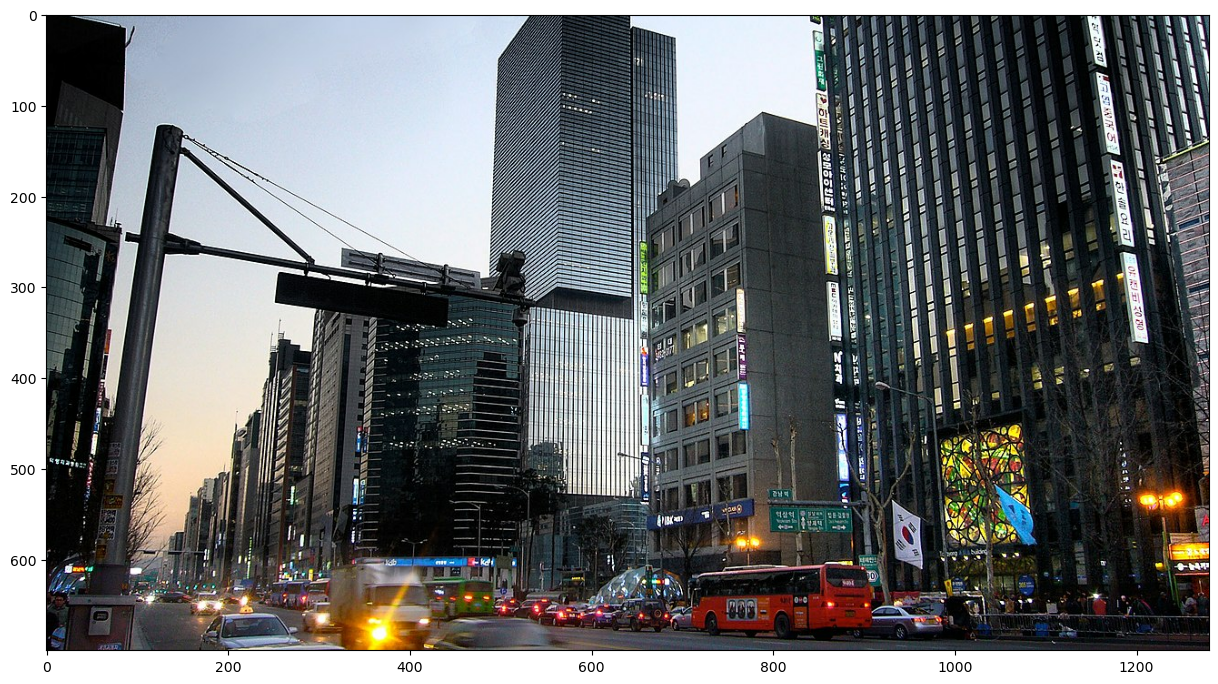

In [17]:
import matplotlib.pylab as plt
import tensorflow as tf
plt.figure(figsize=(15, 10))
img = tf.io.read_file('../gangnam.jpg')  
img = tf.image.decode_jpeg(img, channels=3)   
img = tf.image.convert_image_dtype(img, tf.float32)   #
plt.imshow(img)

## YOLO V4 모델로 객체 탐지

In [2]:
import subprocess
import darknet
# Darknet 실행
!cmd /c ./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/gangnam.jpg

'.'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [35]:
import os

# 현재 작업 디렉토리 출력
current_directory = os.getcwd()
print("현재 작업 디렉토리:", current_directory)

# darknet.exe 파일 경로 생성
darknet_exe_path = os.path.join(current_directory, "darknet.exe")

# darknet.exe 파일의 존재 여부 확인
if os.path.exists(darknet_exe_path):
    print("darknet.exe 파일 경로:", darknet_exe_path)
else:
    print("darknet.exe 파일이 현재 작업 디렉토리에 존재하지 않습니다.")

현재 작업 디렉토리: C:\Users\LEEMIJU\Documents\Python\Open_CV\object_detection_hub_yolo4
darknet 파일이 현재 작업 디렉토리에 존재하지 않습니다.


In [1]:
import subprocess

# Darknet 실행
#!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /content/darknet/gangnam.jpg

# Darknet 명령어를 Python 리스트 형태로 저장합니다.
darknet_command = [
    "./darknet",
    "detector",
    "test",
    "darknet/cfg/coco.data",
    "darknet/cfg/yolov4.cfg",
    "yolov4.weights",
    "./gangnam.jpg"
]

# subprocess를 사용하여 명령어를 실행합니다.
result = subprocess.run(darknet_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

# 실행 결과를 출력합니다.
print("Standard Output:")
print(result.stdout)

print("\nStandard Error:")
print(result.stderr)

PermissionError: [WinError 5] 액세스가 거부되었습니다

## 객체 탐지 결과 시각화

In [13]:
import matplotlib.pylab as plt
import tensorflow as tf
plt.figure(figsize=(15, 10))
img = tf.io.read_file('darknet/predictions.jpg')  
img = tf.image.decode_jpeg(img, channels=3)   
img = tf.image.convert_image_dtype(img, tf.float32)   #
plt.imshow(img)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 159: invalid start byte

<Figure size 1500x1000 with 0 Axes>